<a href="https://colab.research.google.com/github/sripriyaagarwal16/Integrated-Platform-for-health-prediction/blob/main/Majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Brain Tumor

Uploading dataset

In [ ]:
#Brain tumor

!mkdir my-dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (24).zip to archive (24).zip


In [ ]:
import zipfile
with zipfile.ZipFile('Braintumor.zip', 'r') as zip_ref:
    zip_ref.extractall('my_dataset')


Preprocessing Data

In [ ]:
classes={"no_tumor":0,"tumor":1}


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
data=[]
paths=[]
result=[]

for r,d,f in os.walk('/content/my_dataset/brain_tumor_dataset/yes'):
  for file in f :
    if  '.jpg' in file:
      paths.append(os.path.join(r,file))

for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if (img.shape==(128,128,3)):
    data.append(np.array(img))
    result.append(encoder.transform([[0]]).toarray())


In [ ]:
paths=[]
for r,d,f in os.walk('/content/my_dataset/brain_tumor_dataset/no'):
  for file in f :
    if  '.jpg' in file:
      paths.append(os.path.join(r,file))

for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if (img.shape==(128,128,3)):
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())

In [ ]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result=np.array(result)
result=result.reshape(139,2)

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a data generator for training data
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalize pixel values between 0 and 1

# Flow training images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    '/content/my_dataset',  # Specify the path to your training data directory
    target_size=(224, 224),   # Resize images to the desired size
    batch_size=32,            # Choose a suitable batch size
    class_mode='binary'       # Use 'binary' for binary classification (tumor or non-tumor)
)



Found 506 images belonging to 3 classes.


In [ ]:
# Get the number of training samples
num_train_samples = train_generator.samples

# Define the number of classes
num_classes = train_generator.num_classes


Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Step 1: Split the dataset into training and valid
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, random_state=42)


CNN MODEL

In [ ]:
# Step 2: Build a simple CNN model
model = Sequential()

model.add(Conv2D(32, (2, 2), strides=1, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(32, (2, 2), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), strides=1, padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))



model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()










Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

Training the model

In [ ]:
# Train the model
history=model.fit(x_train,y_train,batch_size=40, epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
3/3 [==============================] - 0s 157ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 6.6705 - val_accuracy: 0.7857
Epoch 2/30
3/3 [==============================] - 0s 155ms/step - loss: 2.2450e-05 - accuracy: 1.0000 - val_loss: 6.5102 - val_accuracy: 0.7857
Epoch 3/30
3/3 [==============================] - 0s 155ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.2663 - val_accuracy: 0.7500
Epoch 4/30
3/3 [==============================] - 0s 86ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 5.0094 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 0s 107ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.3368 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 0s 96ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 3.9221 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 0s 103ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 5.9668 - val_accuracy: 0.6071
Epoch 8/30
3/3 [==

Plotting Losses

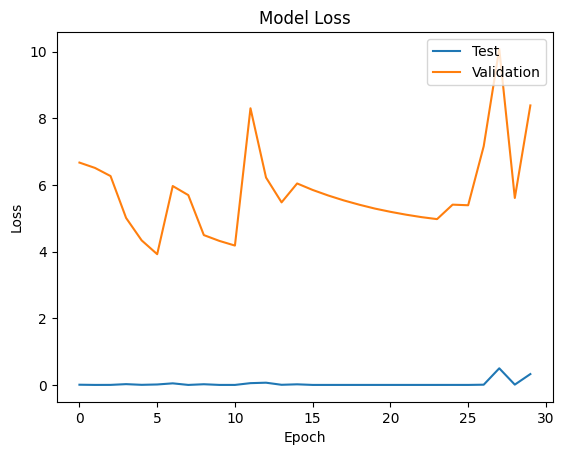

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()


Testing the model

In [ ]:
def names(number):
  if number==0:
    return 'its a tumor'
  else:
    return 'congrats you dont have tumor!!'

100.0% Confidence this is  congrats you dont have tumor!!


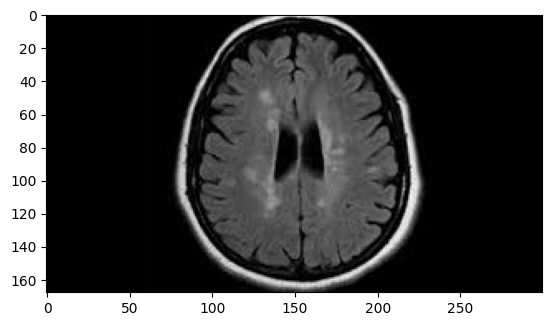

In [ ]:
from matplotlib.pyplot import imshow
img=Image.open ('/content/my_dataset/brain_tumor_dataset/no/13 no.jpg')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  '% Confidence this is  '  +   names(classification))


100.0% Confidence this is its a tumor


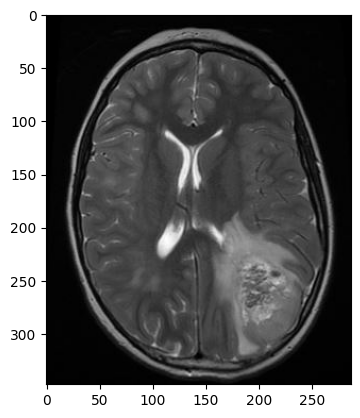

In [ ]:
from matplotlib.pyplot import imshow
img=Image.open ('/content/my_dataset/yes/Y100.JPG')

x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  '% Confidence this is '  +   names(classification))

Model Performance

In [ ]:
predicted_labels.shape

(56,)

In [ ]:
y_test=y_test.reshape(56,1)

In [ ]:
# Assuming predictions is a 1D array of probabilities
predicted_labels = (predictions > 0.5).astype(int)


1/1 [==============================] - 0s 32ms/step


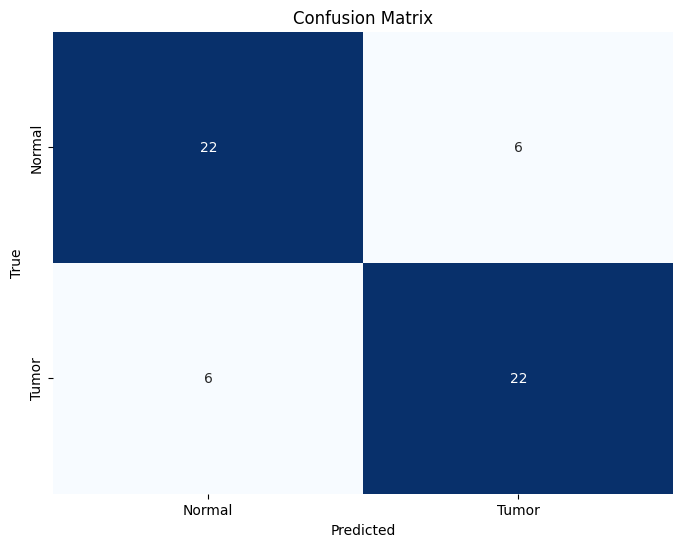

              precision    recall  f1-score   support

      Normal       0.79      0.79      0.79        28
       Tumor       0.79      0.79      0.79        28

    accuracy                           0.79        56
   macro avg       0.79      0.79      0.79        56
weighted avg       0.79      0.79      0.79        56



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and obtained predictions for test data
# x_test and y_test should contain your test data and true labels
# model should be your trained machine learning model

# Make predictions on the test data
predictions = model.predict(x_test)

# Convert predicted probabilities to binary predictions (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Assuming binary classification

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, predicted_labels, target_names=['Normal', 'Tumor'])
print(report)


##CHEST XRAY

Downloading Dataset



In [ ]:
#chest xray
!mkdir my-chestxray

mkdir: cannot create directory ‘my-chestxray’: File exists


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia



100% 2.29G/2.29G [00:22<00:00, 206MB/s]
100% 2.29G/2.29G [00:22<00:00, 109MB/s]


In [ ]:
!unzip -q chest-xray-pneumonia.zip -d my-chestxray


replace my-chestxray/chest_xray/test/NORMAL/IM-0001-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Preprocessiong Dataset

In [ ]:
from PIL import Image
import os
import numpy as np

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:


labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_data(data_dir):
    data = []

    for label in labels:
        path = os.path.join(data_dir, label)  # Corrected line
        class_num = labels.index(label)

        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data)


In [ ]:
train= get_data("/content/my-chestxray/chest_xray/chest_xray/train")
test= get_data("/content/my-chestxray/chest_xray/chest_xray/test")
validation=get_data("/content/my-chestxray/chest_xray/chest_xray/val")

<ipython-input-8-1c75b3ace8f0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []

x_val=[]
y_val=[]

x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

for feature,label in val:
  x_val.append(feature)
  y_val.append(label)


In [ ]:
positives=[]
negatives=[]
for i in range(len(y_train)):
  if y_train[i]:
    positives.append(x_train[i] )
  else:
    negatives.append(x_train[i])

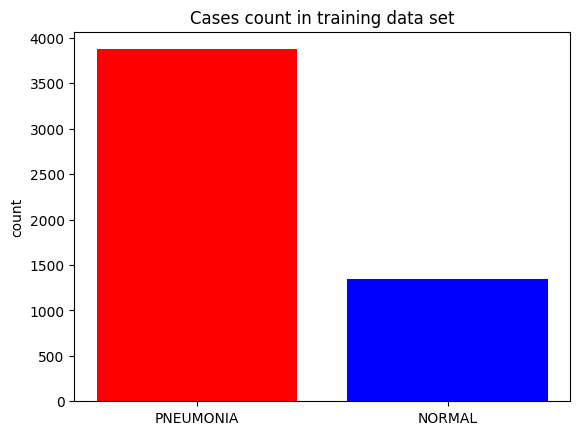

In [ ]:
plt.bar(labels, [len(negatives), len (positives)], color=["red", "blue"])
plt.title("Cases count in training data set")
plt.ylabel("count")
plt.show()



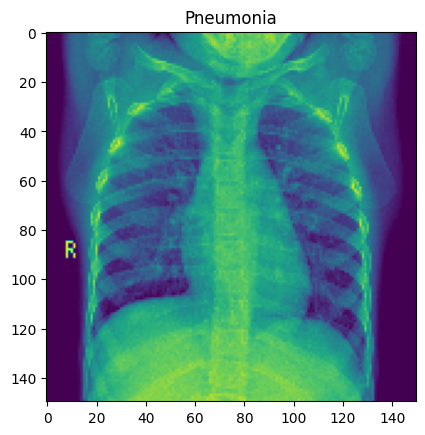

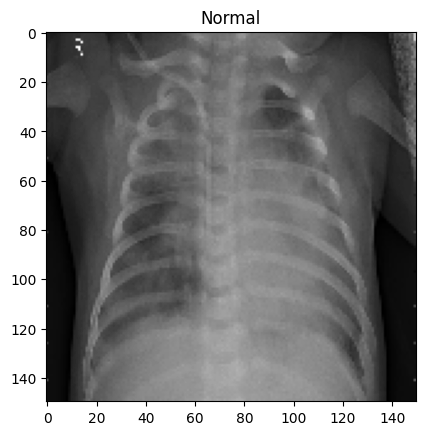

In [ ]:
plt.imshow(positives[0])
plt.title("Pneumonia")
plt.show()

plt.imshow(negatives [4],cmap="gray")
plt.title("Normal")
plt.show()



In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val=np.array(x_val)/255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train=np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val=np.array(y_val)

x_test= x_test.reshape(-1, img_size, img_size, 1)
y_test= np.array(y_test)

In [ ]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_val=y_val(-1,1)

Data-Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)
datagen.fit(x_train)

In [ ]:
!mkdir augmented_images

In [ ]:
import cv2
import os
import numpy as np
import random

# Create a directory to save augmented images
augmented_dir = '/content/augmented_images/'
os.makedirs(augmented_dir, exist_ok=True)

# Augmentation parameters
num_augmented_images = 5
rotation_range = 20
width_shift_range = 0.1
height_shift_range = 0.1
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True
brightness_range = (0.8, 1.2)


CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_3 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 75, 75, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau (monitor = 'val_accuracy',patience = 2, verbose=1,factor=0.3,

min_lr=0.000001)

Training the Model

In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=datagen.flow(x_val,y_val),
    callbacks=[learning_rate_reduction]
)


Epoch 1/10
163/163 [==============================] - ETA: 0s - loss: 1.0172 - accuracy: 0.7143

163/163 [==============================] - 28s 137ms/step - loss: 1.0172 - accuracy: 0.7143 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - ETA: 0s - loss: 0.6194 - accuracy: 0.7381

163/163 [==============================] - 16s 96ms/step - loss: 0.6194 - accuracy: 0.7381 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - ETA: 0s - loss: 0.5879 - accuracy: 0.7402

163/163 [==============================] - 15s 95ms/step - loss: 0.5879 - accuracy: 0.7402 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - ETA: 0s - loss: 0.6056 - accuracy: 0.7354

163/163 [==============================] - 16s 101ms/step - loss: 0.6056 - accuracy: 0.7354 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.7446

163/163 [==============================] - 16s 95ms/step - loss: 0.5824 - accuracy: 0.7446 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - ETA: 0s - loss: 0.5896 - accuracy: 0.7437

163/163 [==============================] - 17s 106ms/step - loss: 0.5896 - accuracy: 0.7437 - lr: 0.0010
Epoch 7/10
163/163 [==============================] - ETA: 0s - loss: 0.5819 - accuracy: 0.7465

163/163 [==============================] - 16s 97ms/step - loss: 0.5819 - accuracy: 0.7465 - lr: 0.0010
Epoch 8/10
163/163 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.7465

163/163 [==============================] - 15s 94ms/step - loss: 0.5801 - accuracy: 0.7465 - lr: 0.0010
Epoch 9/10
163/163 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.7487

163/163 [==============================] - 16s 95ms/step - loss: 0.5801 - accuracy: 0.7487 - lr: 0.0010
Epoch 10/10
163/163 [==============================] - ETA: 0s - loss: 0.5825 - accuracy: 0.7481

163/163 [==============================] - 17s 102ms/step - loss: 0.5825 - accuracy: 0.7481 - lr: 0.0010


Model Performance

In [ ]:
print("loss of the model is" ,model.evaluate(x_test,y_test)[0])
print("accuracy of the model is",model.evaluate(x_test,y_test)[1]*100, "%")


20/20 [==============================] - 1s 21ms/step


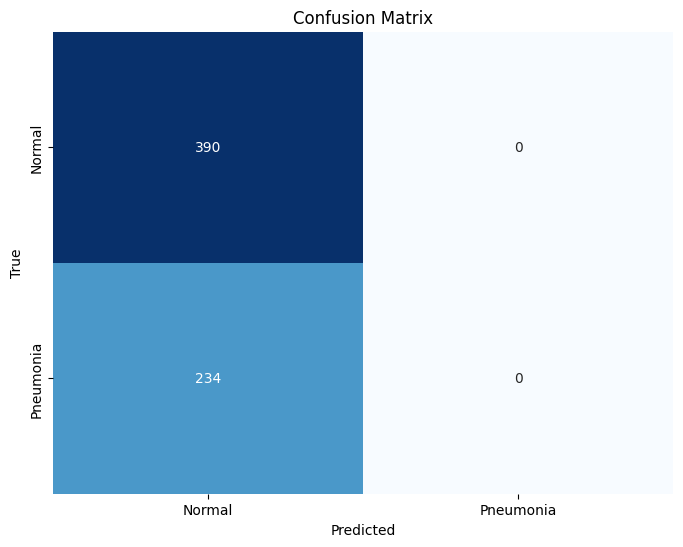

              precision    recall  f1-score   support

      Normal       0.62      1.00      0.77       390
   Pneumonia       0.00      0.00      0.00       234

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already trained your model and obtained predictions
# x_train, x_test, y_train, and y_test should be your training and testing data and labels
# model should be your trained machine learning model

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert predicted probabilities to binary predictions (0 or 1)
predicted_labels = (y_pred > 0.5).astype(int).flatten()  # Assuming binary classification

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, predicted_labels, target_names=['Normal', 'Pneumonia'])
print(report)


###Cardiac Heart dieseases

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Data Preprocessing

In [ ]:
heart=pd.read_csv('heart.csv')


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.shape

(1836, 12)

In [ ]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
X=heart.drop(columns=['HeartDisease','Oldpeak'])
Y=heart['HeartDisease']

In [ ]:
X.shape

(1836, 10)

In [ ]:
Y.shape

(1836,)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
heart['Sex']= label_encoder.fit_transform(heart['Sex'])
heart['ChestPainType']= label_encoder.fit_transform(heart['ChestPainType'])
heart['RestingECG']= label_encoder.fit_transform(heart['RestingECG'])
heart['ExerciseAngina']= label_encoder.fit_transform(heart['ExerciseAngina'])
heart['ST_Slope']= label_encoder.fit_transform(heart['ST_Slope'])

heart['Sex'].unique()
heart['ChestPainType'].unique()
heart['RestingECG'].unique()
heart['ExerciseAngina'].unique()
heart['ST_Slope'].unique()

array([2, 1, 0])

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope
0,40,1,1,140,289,0,1,172,0,2
1,49,0,2,160,180,0,1,156,0,1
2,37,1,1,130,283,0,2,98,0,2
3,48,0,0,138,214,0,1,108,1,1
4,54,1,2,150,195,0,1,122,0,2


Split the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2) #splitting the model into 80:20 ratio

In [ ]:
X_train.shape

(1468, 10)

In [ ]:
X_test.shape

(368, 10)

KNN model

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)


In [ ]:
model.fit(X_train, Y_train)


KNeighborsClassifier()

In [ ]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
Y_test

748     1
135     1
1175    0
1039    0
1497    1
       ..
471     1
1752    0
524     0
201     0
1797    1
Name: HeartDisease, Length: 368, dtype: int64

In [ ]:
model.score(X_test, Y_test)

0.7527173913043478

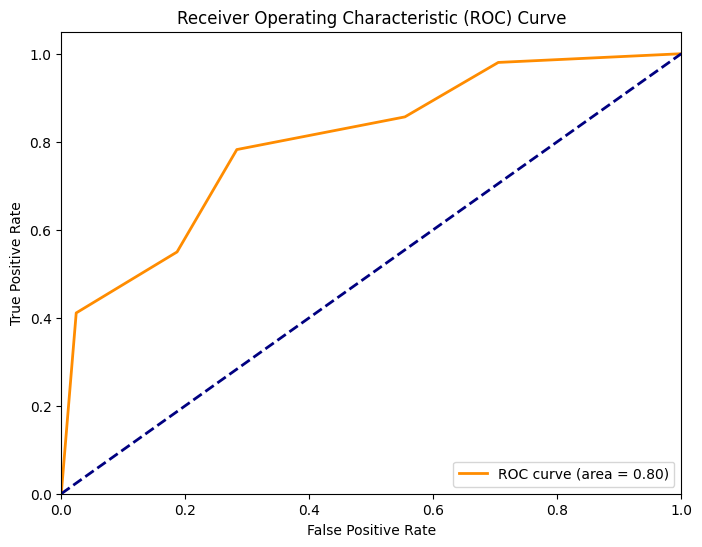

AUC: 0.80


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

# Assuming you have already trained your model and obtained predictions
# x_train, x_test, y_train, and y_test should be your training and testing data and labels
# model should be your trained machine learning model

# Make predictions on the test data
y_pred = model.predict_proba(X_test)[:, 1]  # Use predicted probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print('AUC: {:.2f}'.format(roc_auc))


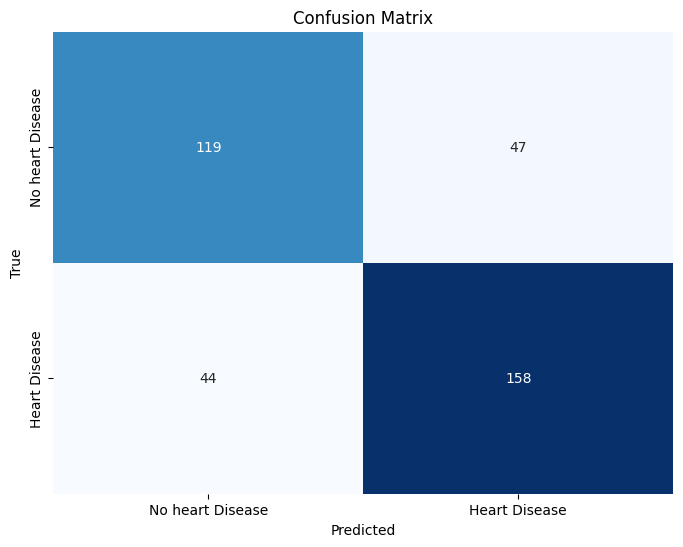

              precision    recall  f1-score   support

  No Disease       0.73      0.72      0.72       166
     Disease       0.77      0.78      0.78       202

    accuracy                           0.75       368
   macro avg       0.75      0.75      0.75       368
weighted avg       0.75      0.75      0.75       368



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already trained your model and obtained predictions
# x_train, x_test, y_train, and y_test should be your training and testing data and labels
# model should be your trained machine learning model

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
predicted_labels = (y_pred > 0.5).astype(int).flatten()  # Assuming binary classification

# Create the confusion matrix
confusion_mat = confusion_matrix(Y_test, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No heart Disease', 'Heart Disease'], yticklabels=['No heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(Y_test, predicted_labels, target_names=['No Disease', 'Disease'])
print(report)


###FITNESS MODEL

 Healthy food prediction

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
food=pd.read_csv('fastfood.csv')

In [ ]:
food.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0


In [ ]:
food.isna().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
Healthy          0
dtype: int64

In [ ]:
food=food.drop(columns=['restaurant','fiber','protein' ,'vit_a','vit_c','calcium'],axis=1)


In [ ]:
food.dtypes

item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
sugar            int64
Healthy          int64
dtype: object

In [ ]:
food['sat_fat'] = food['sat_fat'].round().astype(int)
food['trans_fat'] = food['trans_fat'].round().astype(int)


In [ ]:
food.dtypes

item           object
calories        int64
cal_fat         int64
total_fat       int64
sat_fat         int64
trans_fat       int64
cholesterol     int64
sodium          int64
total_carb      int64
sugar           int64
Healthy         int64
dtype: object

In [ ]:
food.head()


,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,Healthy
0,Artisan Grilled Chicken Sandwich,380,60,7,2,0,95,1110,44,11,1
1,Single Bacon Smokehouse Burger,840,410,45,17,2,130,1580,62,18,0
2,Double Bacon Smokehouse Burger,1130,600,67,27,3,220,1920,63,18,0
3,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0,155,1940,62,18,1
4,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0,120,1980,81,18,0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
food['item']= le.fit_transform(food['item'])

In [ ]:
food.head()

,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,Healthy
0,91,380,60,7,2,0,95,1110,44,11,1
1,420,840,410,45,17,2,130,1580,62,18,0
2,242,1130,600,67,27,3,220,1920,63,18,0
3,313,750,280,31,10,0,155,1940,62,18,1
4,211,920,410,45,12,0,120,1980,81,18,0


In [ ]:
X=food.drop(columns=['Healthy'])
Y=food['Healthy']

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y, test_size=0.2) #splitting the model into 80:20 ratio

decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(X1_train,Y1_train)

DecisionTreeClassifier()

In [ ]:
model.predict(X1_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
Y1_test

392    1
31     0
200    0
17     1
73     1
      ..
462    1
154    0
421    0
283    1
177    1
Name: Healthy, Length: 103, dtype: int64

In [ ]:
model.score(X1_test,Y1_test)

0.9223300970873787

Model Performance

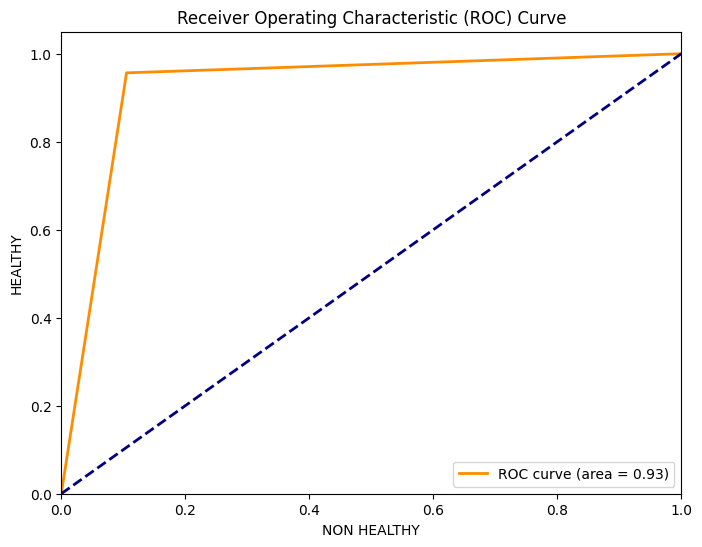

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already trained your model and obtained predictions
# x_train, x_test, y_train, and y_test should be your training and testing data and labels
# model should be your trained machine learning model

# Make predictions on the test data
y_pred = model.predict_proba(X1_test)[:, 1]  # Use predicted probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y1_test, y_pred)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('NON HEALTHY')
plt.ylabel('HEALTHY')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



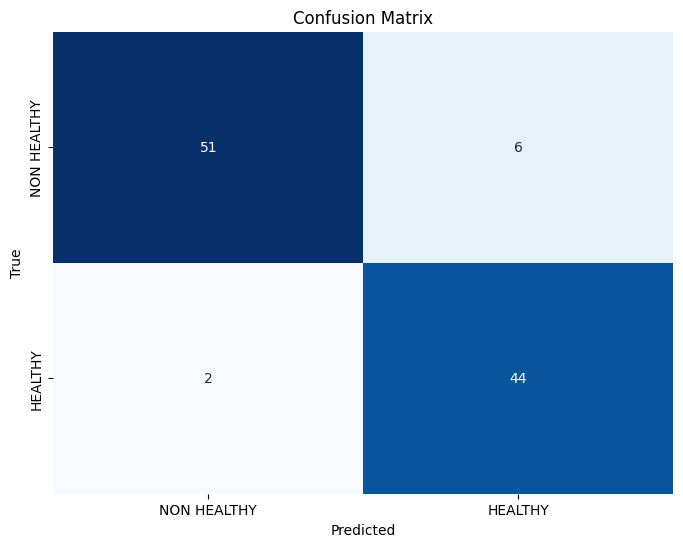

              precision    recall  f1-score   support

 NON HEALTHY       0.96      0.89      0.93        57
     HEALTHY       0.88      0.96      0.92        46

    accuracy                           0.92       103
   macro avg       0.92      0.93      0.92       103
weighted avg       0.93      0.92      0.92       103



In [ ]:
# Calculate Confusion Matrix
threshold = 0.5  # Adjust threshold if needed
y_pred_binary = (y_pred > threshold).astype(int)
confusion_mat = confusion_matrix(Y1_test, y_pred_binary)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['NON HEALTHY', 'HEALTHY'], yticklabels=['NON HEALTHY', 'HEALTHY'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(Y1_test, y_pred_binary, target_names=['NON HEALTHY', 'HEALTHY'])
print(report)


#Mental Health Prediction

In [ ]:
health=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Mentally fit
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0


In [ ]:
health.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Mentally fit                 int64
dtype: object

In [ ]:
health=health.drop(columns=['Blood Pressure'])

In [ ]:

health.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Mentally fit               0
dtype: int64

In [ ]:
health['Sleep Duration'] = health['Sleep Duration'].round().astype(int)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
health['Gender']= le.fit_transform(health['Gender'])
health['Occupation']= le.fit_transform(health['Occupation'])
health['BMI Category']= le.fit_transform(health['BMI Category'])
health['Sleep Disorder']= le.fit_transform(health['Sleep Disorder'])


In [ ]:
X=health.drop(columns=['Mentally fit'])
Y=health['Mentally fit']

In [ ]:

from sklearn.model_selection import train_test_split
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X,Y, test_size=0.2) #splitting the model into 80:20 ratio

Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)

In [ ]:
rfc.fit(X3_train,Y3_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rfc.predict(X3_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
Y3_test


131    1
238    0
215    1
138    1
84     1
      ..
250    0
210    1
298    0
266    1
68     0
Name: Mentally fit, Length: 75, dtype: int64

In [ ]:
rfc.score(X3_test,Y3_test)


0.92

##Diabetes Prediction

In [ ]:
diabetes=pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
diabetes['age'] = diabetes['age'].round().astype(int)
diabetes['bmi'] = diabetes['bmi'].round().astype(int)
diabetes['HbA1c_level'] = diabetes['HbA1c_level'].round().astype(int)

In [ ]:
diabetes=diabetes.drop(columns=['smoking_history'])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diabetes['gender']= le.fit_transform(diabetes['gender'])

In [ ]:
X2=diabetes.drop(columns=['diabetes'])
Y2=diabetes['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X,Y, test_size=0.2) #splitting the model into 80:20 ratio

Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)

In [ ]:
rfc.fit(X2_train,Y2_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rfc.predict(X2_test)


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
Y2_test

81705    0
56528    0
85372    0
41064    0
98414    0
        ..
91427    0
66745    0
34550    0
41910    1
50656    0
Name: diabetes, Length: 20000, dtype: int64

In [ ]:
rfc.score(X2_test,Y2_test)

0.96405

In [ ]:
# Create the directory if it doesn't exist
import os
model_directory = '/content/model_directory'
os.makedirs(model_directory, exist_ok=True)

# Save the model to the directory
model.save(os.path.join(model_directory, 'your_model_name.h5'))


NameError: ignored